In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import re
from hanspell import spell_checker

In [2]:
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
def processing(text):
    spelled_sent = spell_checker.check(text)
    hanspell_sent = spelled_sent.checked 
    return hanspell_sent

In [4]:
data=pd.read_csv("not_merry_final.csv",encoding="cp949")

In [5]:
data["mate_conts"].isnull().sum()

11796

In [6]:
data.drop(data.loc[data["mate_conts"].isnull()].index, inplace=True)

In [7]:
data["family_conts"].isnull().sum()

1505

In [8]:
data.drop(data.loc[data["family_conts"].isnull()].index, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97568 entries, 0 to 110868
Data columns (total 89 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mem_no            97568 non-null  int64  
 1   mem_sex           97568 non-null  object 
 2   mem_loc           97568 non-null  object 
 3   mem_birth_year    97568 non-null  int64  
 4   mem_birth_month   97568 non-null  int64  
 5   mem_birth_ddi     97568 non-null  object 
 6   rprsn_mov_yn      97568 non-null  object 
 7   photo_cnt         97568 non-null  int64  
 8   mate_conts        97568 non-null  object 
 9   mate_job          97568 non-null  object 
 10  mate_ann_salary   97568 non-null  object 
 11  mate_height       97568 non-null  int64  
 12  mate_weight       97568 non-null  int64  
 13  mate_blood        97568 non-null  object 
 14  mate_religion     97568 non-null  object 
 15  mate_car          97568 non-null  object 
 16  mate_career       97568 non-null  objec

In [10]:
data['label']=0

In [11]:
data.reset_index(inplace=True,drop=True)

In [12]:
data["mate_conts"]=data["mate_conts"].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 0-9 ? !]"," ")

In [13]:
data_m=pd.read_csv("../data/thanks_yeobaya_2.csv",encoding="cp949")

In [14]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11097 entries, 0 to 11096
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   auto_no                11097 non-null  int64  
 1   reg_slct               11097 non-null  object 
 2   reg_mem_no             11097 non-null  int64  
 3   reg_name               0 non-null      float64
 4   reg_title              11097 non-null  object 
 5   reg_sex                11041 non-null  object 
 6   reg_age                11097 non-null  int64  
 7   reg_nick               11036 non-null  object 
 8   reg_photo              7321 non-null   object 
 9   reg_photo_cnt          11097 non-null  int64  
 10  reg_loc                11034 non-null  object 
 11  reg_job_detail         11016 non-null  object 
 12  reg_join_date          11077 non-null  object 
 13  reg_job                11037 non-null  float64
 14  reg_point              11097 non-null  int64  
 15  re

In [15]:
data_m.drop(data_m.loc[data_m["mate_conts"].isnull()].index, inplace=True)

In [16]:
data_m["family_conts"].isnull().sum()

9

In [17]:
data_m.drop(data_m.loc[data_m["family_conts"].isnull()].index, inplace=True)

In [18]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 11090
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   auto_no                10730 non-null  int64  
 1   reg_slct               10730 non-null  object 
 2   reg_mem_no             10730 non-null  int64  
 3   reg_name               0 non-null      float64
 4   reg_title              10730 non-null  object 
 5   reg_sex                10729 non-null  object 
 6   reg_age                10730 non-null  int64  
 7   reg_nick               10730 non-null  object 
 8   reg_photo              7198 non-null   object 
 9   reg_photo_cnt          10730 non-null  int64  
 10  reg_loc                10729 non-null  object 
 11  reg_job_detail         10727 non-null  object 
 12  reg_join_date          10730 non-null  object 
 13  reg_job                10730 non-null  float64
 14  reg_point              10730 non-null  int64  
 15  re

In [19]:
data_m['label']=1

In [20]:
data_m["mate_conts"]=data_m["mate_conts"].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣 0-9 ? !]"," ")

In [21]:
train1=data.loc[:10730,['mate_conts','label']]

In [22]:
train1

,mate_conts,label
0,화려한 돌씽입니다 맘 맞는분 만나서 남은 반생 같이하고 싶습니다 여행가는것 좋...,0
1,삼남매이며 형제간에우애하고 화목한가정에서 자랐습니다 앞으로도 좋은가정을 이뤄나아가고...,0
2,????????????????????????좋은사람 좋은인연 기다립니다 그럼 오늘하...,0
3,반갑습니다 새로운 인연 기다립니다 같은 생각으로 같은 길을 갔으면 합니다,0
4,여보야는 2015년에 런칭했으며 2020년도에는 4만쌍의 성혼을 이루도록 더 많은 ...,0
...,...,...
10726,안녕 하세요 도시생활 정리하고 조그마한 읍내에서 레포츠샵 운영하고 있...,0
10727,인연이돠고싶습니다,0
10728,산다는게 꼭 법칙만 가지고 되는게 아니라 인내와 노력성실과 운이만나야 되는걸 느끼네...,0
10729,현실에서 누군가를 소개 받는게 쉽지 않은 나이입니다 그래서 이 어플에 기대어 자기...,0


In [23]:
train2=data_m.loc[:,['mate_conts','label']]

In [24]:
train2

,mate_conts,label
0,세상사 혼자가는길은 잠시 편할수는 있겠지만 잠시뿐 내가 가는길에 그대와함께라면 ...,1
1,안녕하세요 진솔하게 만나고 싶습니다 잘부탁드려요 ㅎ,1
2,사별하고 육년이 지났네요 이제마음의 상처 뒤로하고밝고 따뜻하며 취미생활 운동 같이...,1
3,서로배려해주고 거짓없는 이성친구 찾고있어요 딸아이가 어느덧 결혼할 나이가 되다보...,1
4,딸 아들을 둔 엄마입니다 자식은 품안에 있을때만이 자식이란 말을절감합니다 각자 ...,1
...,...,...
11043,안녕하세요 가식없고 진실된 비흡연 처자입니다 좋은 배필만나서 부모님 공경하며 ...,1
11085,대전 세종 충남 거주 퇴근후 자주 볼수 있는분 찾습니다 영화보기 맛집탐방 운...,1
11088,안녕하세요?저는 긍정적인 사고방식과명랑쾌활하며계획적인 일상생활을하며 성실히 살아갸고...,1
11089,연하의 차분하고 다저다감한 스타일을 선호합니다 기독교인이며 여행과 독서 그리고 ...,1


In [25]:
train_data=pd.concat([train1,train2],axis=0)

In [26]:
train_data

,mate_conts,label
0,화려한 돌씽입니다 맘 맞는분 만나서 남은 반생 같이하고 싶습니다 여행가는것 좋...,0
1,삼남매이며 형제간에우애하고 화목한가정에서 자랐습니다 앞으로도 좋은가정을 이뤄나아가고...,0
2,????????????????????????좋은사람 좋은인연 기다립니다 그럼 오늘하...,0
3,반갑습니다 새로운 인연 기다립니다 같은 생각으로 같은 길을 갔으면 합니다,0
4,여보야는 2015년에 런칭했으며 2020년도에는 4만쌍의 성혼을 이루도록 더 많은 ...,0
...,...,...
11043,안녕하세요 가식없고 진실된 비흡연 처자입니다 좋은 배필만나서 부모님 공경하며 ...,1
11085,대전 세종 충남 거주 퇴근후 자주 볼수 있는분 찾습니다 영화보기 맛집탐방 운...,1
11088,안녕하세요?저는 긍정적인 사고방식과명랑쾌활하며계획적인 일상생활을하며 성실히 살아갸고...,1
11089,연하의 차분하고 다저다감한 스타일을 선호합니다 기독교인이며 여행과 독서 그리고 ...,1


In [27]:
train_data.reset_index(drop=True,inplace=True)

In [28]:
train_data.to_csv("train_data2.csv")

In [29]:
X=train_data["mate_conts"]
y=train_data['label']

In [30]:
y=pd.get_dummies(y)

In [31]:
y

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
21456,0,1
21457,0,1
21458,0,1
21459,0,1


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [33]:
X_train

9683     안녕하세요     결혼하고 늘 한결같이  챙겨주고싶은  인연을 만났으면 합니다   ...
6521     저는 평범하고 근면성실하며 근검절약하는 사람입니다  그런 저와 같이 알뜰살뜰 하게 ...
16074    1  애 딸린 홀아비 13년차  재혼 힘든거 알고있음  맘 비움   2  그냥 저냥...
14920    여러분들은 실패의 원인을 알고 있습니까? 과연 나는 잘했을까요? 자신의 단점의 팩트...
18818    좋은연분기대합니다 말보다 행동 진실 믿음 배려 존중 두손꼭잡고 살수있도록 나의반쪽분...
                               ...                        
6400     안녕하세요  ! 저는 이렇답니다  성격은다정하고 유 하며 공감능력이 좋고 생각이 깨...
15288    안녕하세요? 반갑습니다   좋은사람 편한사람 함께 공유할수있는분  만나고싶네요  남...
11513    수출입 콘테이너 를 같이 타고 다니면서 과일도 먹여주고사랑할 배우자를 구합니다 종손...
1688     저는 그냥 평범한사람입니다 조용하고 술 담배   완전체 못합니다 또래 편한친구 찾습...
5994     아름다운  꽃길이 눈부시게 마음이 설레듯  같이 바라보면서   당신과 함께 있고 싶...
Name: mate_conts, Length: 16095, dtype: object

In [34]:
X_test

15450    저는 첫인상은 모두들 까칠할거같다  술잘마실거같다  등등  얘기하지만 술은 전  혀...
2400     전직 호텔리어   현제 초보농사꾼 ??? 입니다 농사짓는다고하면 보통 일은많고 쉬는...
20193    안녕하세요   못 생긴 평범한 남자입니다  그리고 한번 실패로 인해서 서로 아픔을 ...
15896    혼자 지낸지 11년 됐네요  이혼후 사업실패하고 다시  재기하고 자리 매김 하느라 ...
10356    만남이 절실하지만 진실된 만남만을 원합니다  현재 뉴에이지 피아니스트로 활동하면서 ...
                               ...                        
14288            자녀는아들딸둘다출가하고저혼자입니다혼자돼다보니왜롭네요좋은인연만낫으면좋겠읍니다
16005             저는 4살딸키우고 있구요 착하고 듬직한남자였음좋겠어요 제딸도 이뻐해주고요
19134    나이는 숫자에 불과하다생각합니다   시대를 쫓아가며 젊게살고있고 여행  운동 등 활...
17207    혼기 놓친 노총각입니다     현재 하는일은 기술직이구요 정년없이 계속일할수 있어 ...
16077    맘통하구 서로를이해하구 인정해줄수 있는     그렇게 같은취미생활할수있는     거...
Name: mate_conts, Length: 5366, dtype: object

In [35]:
import konlpy
from konlpy.tag import Okt
okt=Okt()

In [36]:
X_train_txt=[]
for sentence in X_train:
    temp_X=[]
    temp_X=okt.morphs(sentence)#토큰화
    X_train_txt.append(temp_X)

In [37]:
X_test_txt=[]
for sentence in X_test:
    temp_X=[]
    temp_X=okt.morphs(sentence)#토큰화
    X_test_txt.append(temp_X)

In [38]:
print(X_train_txt[:3])

[['안녕하세요', '결혼', '하고', '늘', '한결같이', '챙겨주고싶은', '인연', '을', '만났으면', '합니다', '울산', '에서', '안정', '적', '인', '직장', '생활', '하고', '있습니다', '좋은', '인연', '기다리겠습니다'], ['저', '는', '평범하고', '근면', '성실하며', '근', '검', '절약', '하', '는', '사람', '입니다', '그런', '저', '와', '같이', '알뜰살뜰', '하게', '가정', '을', '이루어주실', '분', '을', '찾습니다'], ['1', '애', '딸린', '홀아비', '13년', '차', '재혼', '힘든거', '알고있음', '맘', '비움', '2', '그냥', '저', '냥', '먹구', '살', '만큼', '있구', '벌구', '경제', '적', '안정', '3', '맘', '맞는', '여자친구', '있음', '좋겠음', '집', '가까이', '그러다', '더', '좋아지면', '결혼', '까지', '갈', '수', '있음', '4', '본인', '이', '평범', '하다는', '분', '보다', '자존감', '높으신', '분', '이', '좋음', '남', '들', '보기', '에', '아니더라도', '본인', '스스로', '예쁨', '섹시', '하다고', '생각', '하시는', '분', '그런', '분', '멋짐', '5', '!', '전', '그닥', '잘생기지도', '않았고', '키도', '큰', '편', '아니니', '참고', '신체', '는', '건강함', '남자', '로서', '이상', '없음', '남자', '처럼', '생김', '육아', '살림', '요리', '잘', '함', '나름', '똑똑', '사회생활', '잘', '함']]


In [39]:
print(X_test_txt[:3])

[['저', '는', '첫인상', '은', '모두', '들', '까칠할거', '같다', '술', '잘', '마실거', '같다', '등등', '얘기', '하지만', '술', '은', '전', '혀', '입', '에도', '못', '대', '고', '사교성', '있고', '친해지면', '친', '근', '감', '있게', '상대', '를', '불편하게하는', '스타일', '은', '아닙니다', '부탁드립니다', '아무나', '찔러', '보는', '분', '들', '정중히', '사절', '합니다', '저', '는', '그러려고', '가입', '했던건', '절대', '아니', '라서', '요', '그리고', '저', '는', '아이', '가', '있기에', '제', '상황', '모두', '고려', '해서', '진실성', '있게', '다가와주시는', '분', '을', '원해요', '저', '는', '저', '보다는', '아이', '를', '먼저', '생각', '해주시고', '힘든', '일이', '라는', '건', '알', '지만', '진심', '으로', '아이', '를', '대', '할줄아는', '분이면', '좋겠네요', '또', '하나', '경제', '적', '능력', '도', '있는', '분이면', '더', '좋겠져', '?'], ['전직', '호텔리어', '현', '제', '초보', '농사', '꾼', '???', '입니다', '농사짓는다고', '하면', '보통', '일', '은', '많고', '쉬는', '날', '없이', '바쁘다고', '생각', '하시겠지만', '그', '반대', '로', '쉬는', '날', '도', '많으며', '연봉', '도', '제', '또래', '보다는', '1', '5', '배는', '많이', '번다', '고', '자부', '합니다', '흡연', '은', '하지만', '전자담배', '를', '피기', '때문', '에', '담배', '냄새', '는', '전혀', '안나', '며', '초혼', '재혼', '은', '그닥', '중요하게', 

In [40]:
from keras_preprocessing.text import Tokenizer
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train_txt)

In [41]:
word_df = pd.DataFrame([tokenizer.word_counts.keys(),
                       tokenizer.word_counts.values()])

In [42]:
word_df = word_df.T

In [43]:
word_df.columns=['word','count']

In [44]:
word_df.sort_values(by='count', ascending=False)

,word,count
7,을,18218
75,이,14440
38,분,9436
85,에,7919
122,은,7733
...,...,...
21518,봤기,1
21517,먹어는,1
21516,징그러운것,1
21515,있는것과,1


In [45]:
max_words=38330
tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_txt)
X_train=tokenizer.texts_to_sequences(X_train_txt)
X_test=tokenizer.texts_to_sequences(X_test_txt)

In [46]:
print(X_train[:3])

[[22, 50, 9, 309, 3411, 12170, 15, 1, 250, 16, 895, 25, 316, 21, 56, 137, 63, 9, 44, 7, 15, 847], [14, 6, 800, 1225, 1545, 1702, 8167, 7144, 75, 6, 8, 10, 82, 14, 53, 31, 8168, 148, 116, 1, 17377, 3, 1, 199], [266, 385, 7145, 9698, 2314, 343, 111, 5388, 12171, 159, 12172, 230, 211, 14, 1546, 3567, 35, 554, 2431, 12173, 373, 21, 316, 394, 159, 215, 1563, 651, 5842, 297, 1158, 1865, 87, 7146, 50, 103, 471, 79, 651, 622, 739, 2, 1547, 5843, 3, 110, 2067, 9699, 3, 2, 3739, 162, 37, 534, 4, 2023, 739, 1274, 12174, 5389, 3568, 23, 198, 3, 82, 3, 12175, 706, 59, 89, 4663, 3039, 3740, 3926, 405, 362, 5844, 472, 782, 6, 5845, 61, 1371, 283, 1138, 61, 85, 9700, 4134, 1259, 294, 27, 420, 295, 4381, 1517, 27, 420]]


In [47]:
print(X_test[:2])

[[14, 6, 1490, 5, 231, 37, 4775, 121, 27, 4775, 1196, 381, 247, 121, 5, 89, 11262, 1905, 718, 93, 150, 20, 3236, 112, 915, 2136, 1702, 1222, 705, 161, 12, 217, 5, 801, 322, 1896, 1027, 665, 3, 37, 609, 169, 16, 14, 6, 11300, 67, 22041, 652, 1516, 1239, 34, 134, 14, 6, 122, 11, 1961, 40, 1334, 231, 3617, 156, 2388, 705, 21164, 3, 1, 551, 14, 6, 14, 182, 122, 12, 289, 23, 6088, 826, 460, 449, 844, 155, 302, 140, 17, 122, 12, 150, 1172, 131, 171, 515, 216, 373, 21, 436, 13, 24, 131, 87, 43], [3611, 11057, 735, 40, 4954, 1568, 4123, 3761, 10, 328, 935, 52, 5, 290, 1349, 243, 126, 8283, 23, 11179, 100, 4816, 39, 1349, 243, 13, 2364, 1290, 13, 40, 3017, 182, 266, 706, 18482, 81, 20, 1184, 16, 246, 5, 247, 5645, 12, 12805, 440, 4, 142, 2127, 6, 908, 4292, 163, 384, 111, 5, 4663, 1366, 23, 191, 277, 31, 303, 387, 13, 208, 238, 45, 13, 2962, 3, 432, 28, 135, 273]]


In [48]:
y_train

,0,1
9683,1,0
6521,1,0
16074,0,1
14920,0,1
18818,0,1
...,...,...
6400,1,0
15288,0,1
11513,0,1
1688,1,0


In [49]:
y_test

,0,1
15450,0,1
2400,1,0
20193,0,1
15896,0,1
10356,1,0
...,...,...
14288,0,1
16005,0,1
19134,0,1
17207,0,1


In [50]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [51]:
y_train

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]], dtype=uint8)

In [52]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from keras_preprocessing.sequence import pad_sequences

In [53]:
x_train_len = [len(x) for x in X_train]

(array([1954., 4733., 3210., 1993., 1367.,  964.,  847.,  826.,  186.,
          15.]),
 array([  0. ,  14.2,  28.4,  42.6,  56.8,  71. ,  85.2,  99.4, 113.6,
        127.8, 142. ]),
 <BarContainer object of 10 artists>)

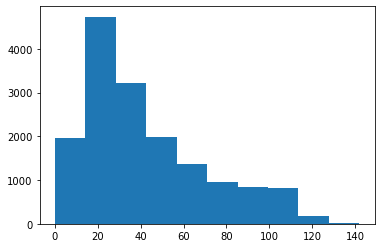

In [54]:
plt.hist(x_train_len)

In [55]:
max_len=130
X_train_pad=pad_sequences(X_train,maxlen=max_len)
X_test_pad=pad_sequences(X_test,maxlen=max_len)

In [56]:
X_train_pad

array([[    0,     0,     0, ...,     7,    15,   847],
       [    0,     0,     0, ...,     3,     1,   199],
       [    0,     0,     0, ...,  1517,    27,   420],
       ...,
       [    0,     0,     0, ..., 38325,   818,  1697],
       [    0,     0,     0, ...,    98,   200, 16791],
       [    0,     0,     0, ...,   208,    44,    43]])

In [78]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [58]:
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import Dropout

In [59]:
filename = '../model/text_model-{epoch:02d}-{val_accuracy:.4f}.hdf5'

In [77]:
mc = ModelCheckpoint(filename,
                     monitor='val_accuracy',
                     verbose=1,
                     save_best_only=True)
es = EarlyStopping(monitor="val_accuracy",patience=100)

In [79]:
model=Sequential()
model.add(Embedding(max_words,100))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])
history=model.fit(X_train_pad,y_train,epochs=1000,batch_size=10,
                  validation_data=(X_test_pad,y_test), callbacks=[mc,es])

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1610/1610 [==============================] - ETA: 0s - loss: 0.6678 - accuracy: 0.5923WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001A98A1DD400> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY

Epoch 23/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9985
Epoch 00023: val_accuracy did not improve from 0.63343
1610/1610 [==============================] - 94s 58ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 3.0711 - val_accuracy: 0.6025
Epoch 24/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9988
Epoch 00024: val_accuracy did not improve from 0.63343
1610/1610 [==============================] - 94s 58ms/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 3.0333 - val_accuracy: 0.6049
Epoch 25/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9982
Epoch 00025: val_accuracy did not improve from 0.63343
1610/1610 [==============================] - 94s 58ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 3.3652 - val_accuracy: 0.5967
Epoch 26/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9989
Epoch 00026: val_accuracy 

1610/1610 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9991
Epoch 00079: val_accuracy did not improve from 0.63343
1610/1610 [==============================] - 94s 58ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 4.2708 - val_accuracy: 0.6083
Epoch 80/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9994
Epoch 00080: val_accuracy did not improve from 0.63343
1610/1610 [==============================] - 94s 58ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 4.6463 - val_accuracy: 0.6029
Epoch 81/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0028 - accuracy: 0.9994
Epoch 00081: val_accuracy did not improve from 0.63343
1610/1610 [==============================] - 94s 58ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 4.2379 - val_accuracy: 0.6131
Epoch 82/1000
1610/1610 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 0.9993
Epoch 00082: val_accuracy did not improv

In [65]:
def predict(sent):
    sentence_before=[]
    sentence_before.append(sent)
    sent_txt=[]
    for sentence in sentence_before:
        temp_X=[]
        temp_X=okt.morphs(sentence)
        sent_txt.append(temp_X)
    
    
    
    max_words=38330
    tokenizer=Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(sent_txt)
    f_data=tokenizer.texts_to_sequences(sent_txt)
    max_len=130
    data_pad=pad_sequences(f_data,maxlen=max_len)
    
    import math
    
    p=model.predict(data_pad)[0][1]
    
    return p

In [66]:
Q="안녕하세요 잘부탁드립니다"

In [73]:
predict(Q)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


0.21524209

In [ ]:
train3=data.loc[:10730,['mate_conts','label']]